In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [3]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [4]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(262,)

In [5]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(262, 50, 50)

In [7]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [8]:
imgs = np.expand_dims(imgs, -1)

In [9]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [10]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [11]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [12]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 33s 2s/step - loss: 3.3576 - accuracy: 0.0663 - val_loss: 3.2788 - val_accuracy: 0.0455
Epoch 2/20
13/13 [==============================] - 34s 3s/step - loss: 3.0998 - accuracy: 0.1633 - val_loss: 2.8823 - val_accuracy: 0.0909
Epoch 3/20
13/13 [==============================] - 30s 2s/step - loss: 1.5368 - accuracy: 0.5714 - val_loss: 1.2634 - val_accuracy: 0.6364
Epoch 4/20
13/13 [==============================] - 35s 3s/step - loss: 0.5922 - accuracy: 0.8214 - val_loss: 0.4292 - val_accuracy: 0.8636
Epoch 5/20
13/13 [==============================] - 36s 3s/step - loss: 0.1654 - accuracy: 0.9541 - val_loss: 0.1915 - val_accuracy: 0.9545
Epoch 6/20
13/13 [==============================] - 37s 3s/step - loss: 0.1330 - accuracy: 0.9592 - val_loss: 0.3010 - val_accuracy: 0.8636
Epoch 7/20
13/13 [==============================] - 32s 2s/step - loss: 0.0926 - accuracy: 0.9745 - val_loss: 0.1504 - val_accuracy: 0.9697
Epoch 8/20
13/13 [==

In [13]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 4s 1s/step


In [14]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

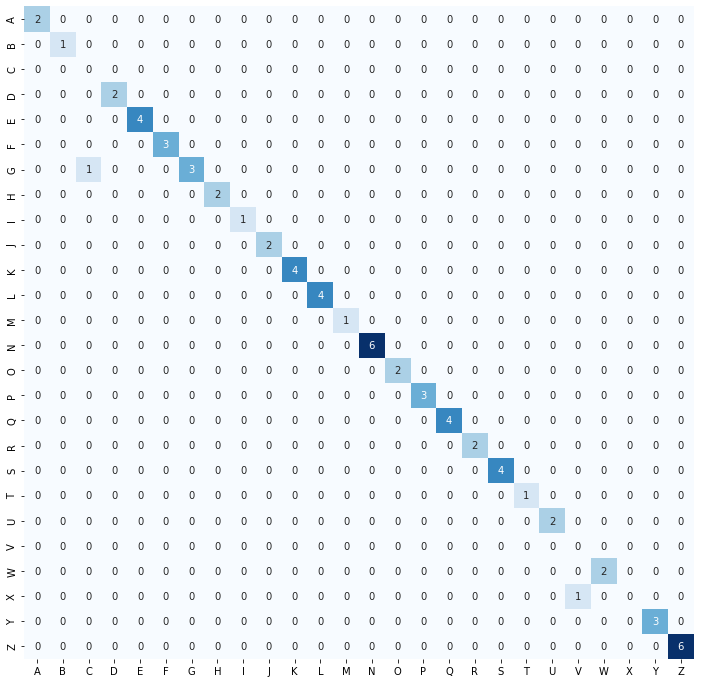

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [16]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
